In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_absolute_error, r2_score

from functions import *

In [2]:
df = pd.read_csv('spotify_songs.csv')
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [3]:
df.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,42.477081,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,24.984074,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


In [4]:
df.shape

(32833, 23)

In [5]:
df.dtypes

track_id                     object
track_name                   object
track_artist                 object
track_popularity              int64
track_album_id               object
track_album_name             object
track_album_release_date     object
playlist_name                object
playlist_id                  object
playlist_genre               object
playlist_subgenre            object
danceability                float64
energy                      float64
key                           int64
loudness                    float64
mode                          int64
speechiness                 float64
acousticness                float64
instrumentalness            float64
liveness                    float64
valence                     float64
tempo                       float64
duration_ms                   int64
dtype: object

In [6]:
df[df.duplicated]

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms


In [7]:
df.isnull().mean().sort_values()

track_id                    0.000000
track_popularity            0.000000
track_album_release_date    0.000000
track_album_id              0.000000
playlist_name               0.000000
playlist_subgenre           0.000000
playlist_genre              0.000000
playlist_id                 0.000000
energy                      0.000000
key                         0.000000
loudness                    0.000000
danceability                0.000000
mode                        0.000000
instrumentalness            0.000000
acousticness                0.000000
speechiness                 0.000000
valence                     0.000000
tempo                       0.000000
duration_ms                 0.000000
liveness                    0.000000
track_artist                0.000152
track_name                  0.000152
track_album_name            0.000152
dtype: float64

**Cleanning and Feature Engineering**

In [8]:
unused_list = ['track_id', 'track_name', 'track_artist', 'track_album_id', 'track_album_name', 'track_album_release_date', 'playlist_id', 'playlist_name']
df = df.drop(unused_list, axis=1)
df.dtypes

track_popularity       int64
playlist_genre        object
playlist_subgenre     object
danceability         float64
energy               float64
key                    int64
loudness             float64
mode                   int64
speechiness          float64
acousticness         float64
instrumentalness     float64
liveness             float64
valence              float64
tempo                float64
duration_ms            int64
dtype: object

In [9]:
df['duration_sec'] = df['duration_ms'] / 1000
df = df.drop(['duration_ms'], axis=1)

Checking for Outliers

array([[<Axes: title={'center': 'track_popularity'}>,
        <Axes: title={'center': 'danceability'}>,
        <Axes: title={'center': 'energy'}>,
        <Axes: title={'center': 'key'}>],
       [<Axes: title={'center': 'loudness'}>,
        <Axes: title={'center': 'mode'}>,
        <Axes: title={'center': 'speechiness'}>,
        <Axes: title={'center': 'acousticness'}>],
       [<Axes: title={'center': 'instrumentalness'}>,
        <Axes: title={'center': 'liveness'}>,
        <Axes: title={'center': 'valence'}>,
        <Axes: title={'center': 'tempo'}>],
       [<Axes: title={'center': 'duration_sec'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

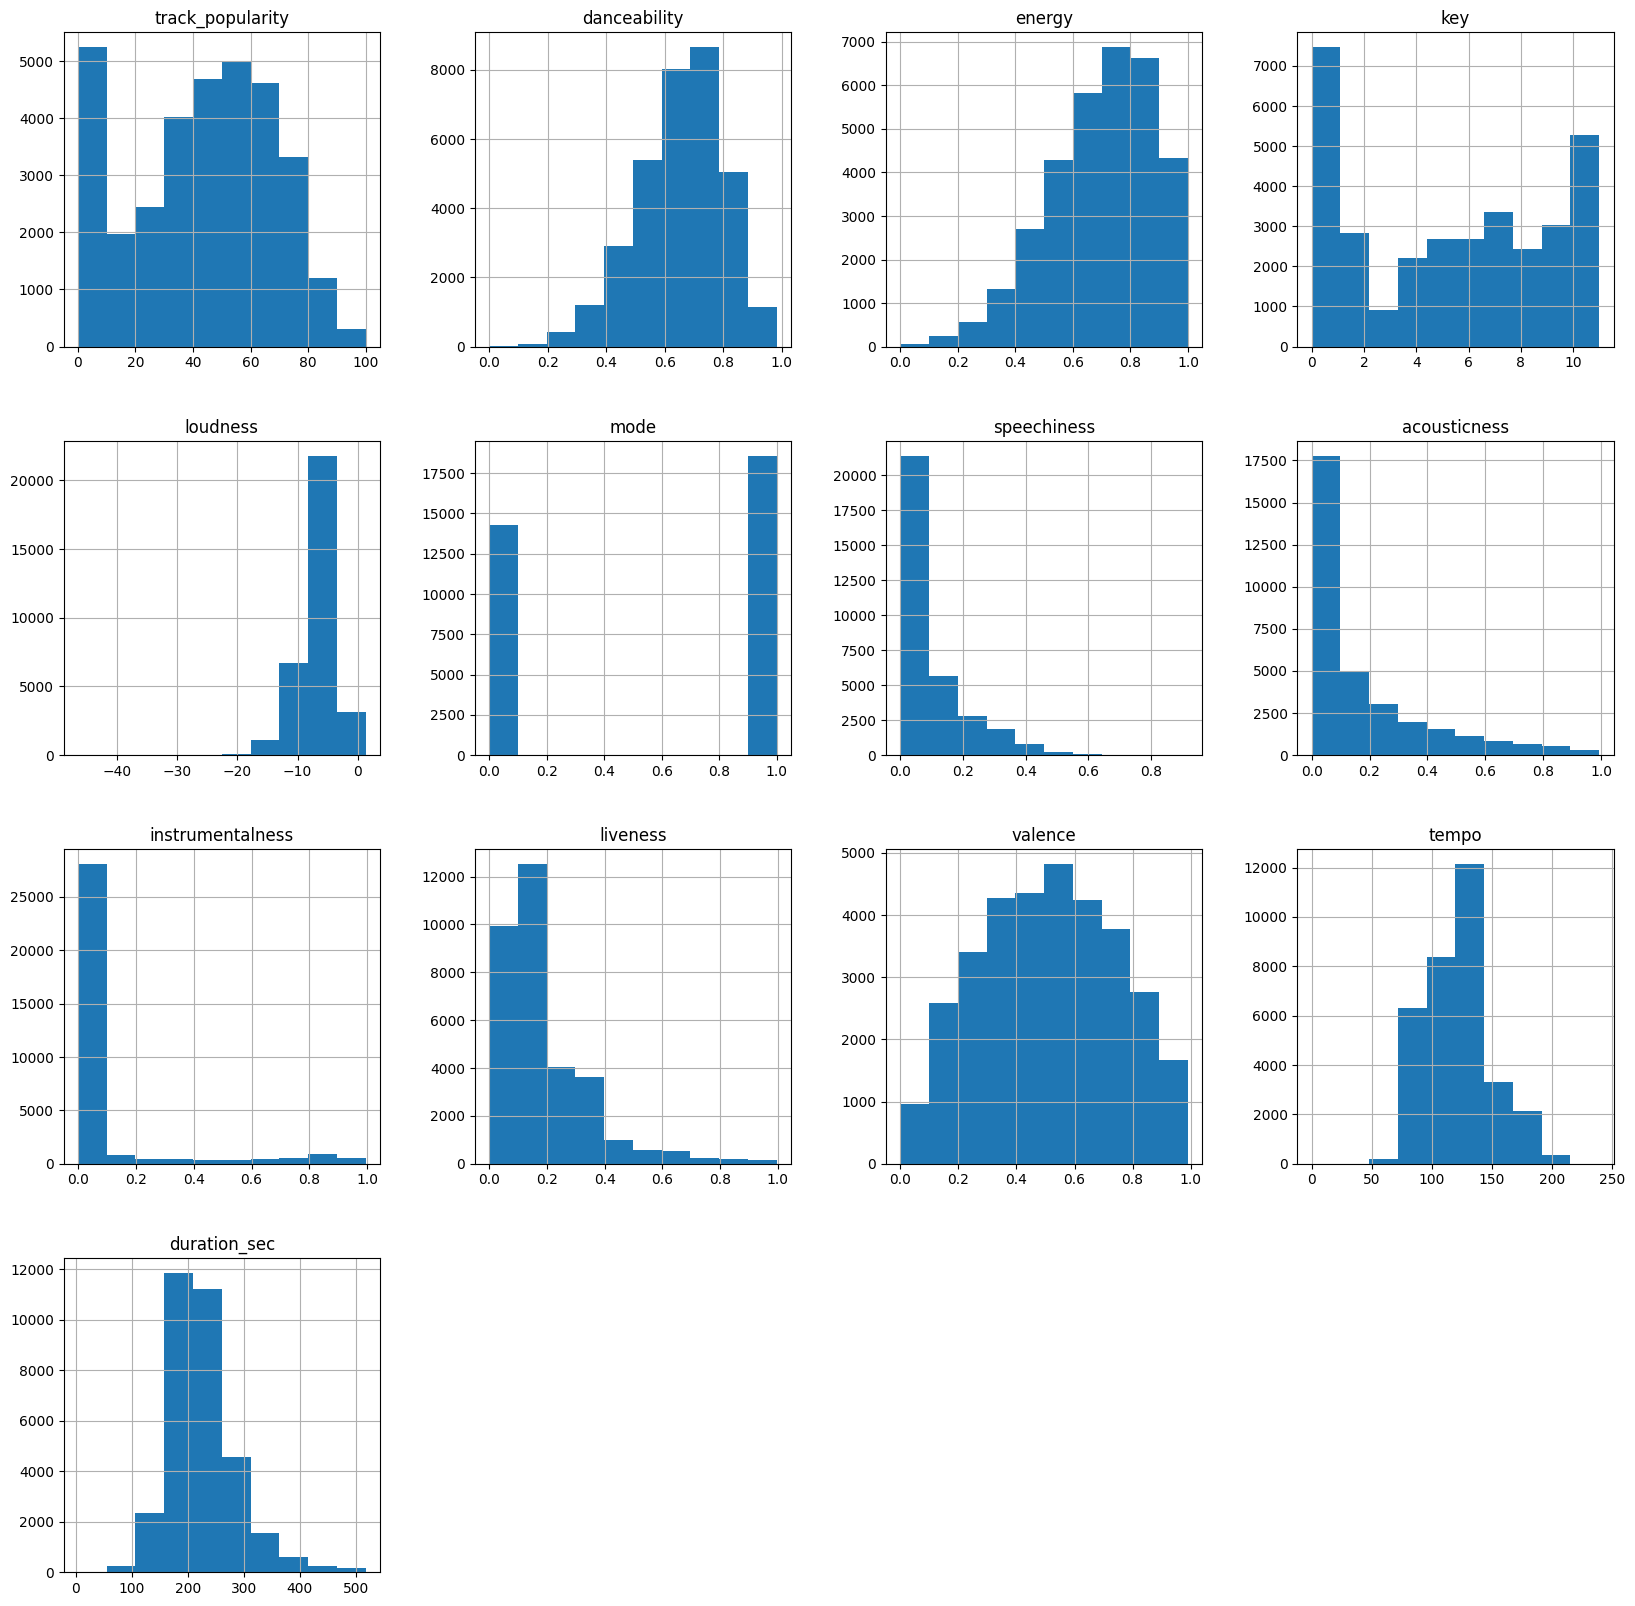

In [10]:
df.hist(figsize=(20, 20))

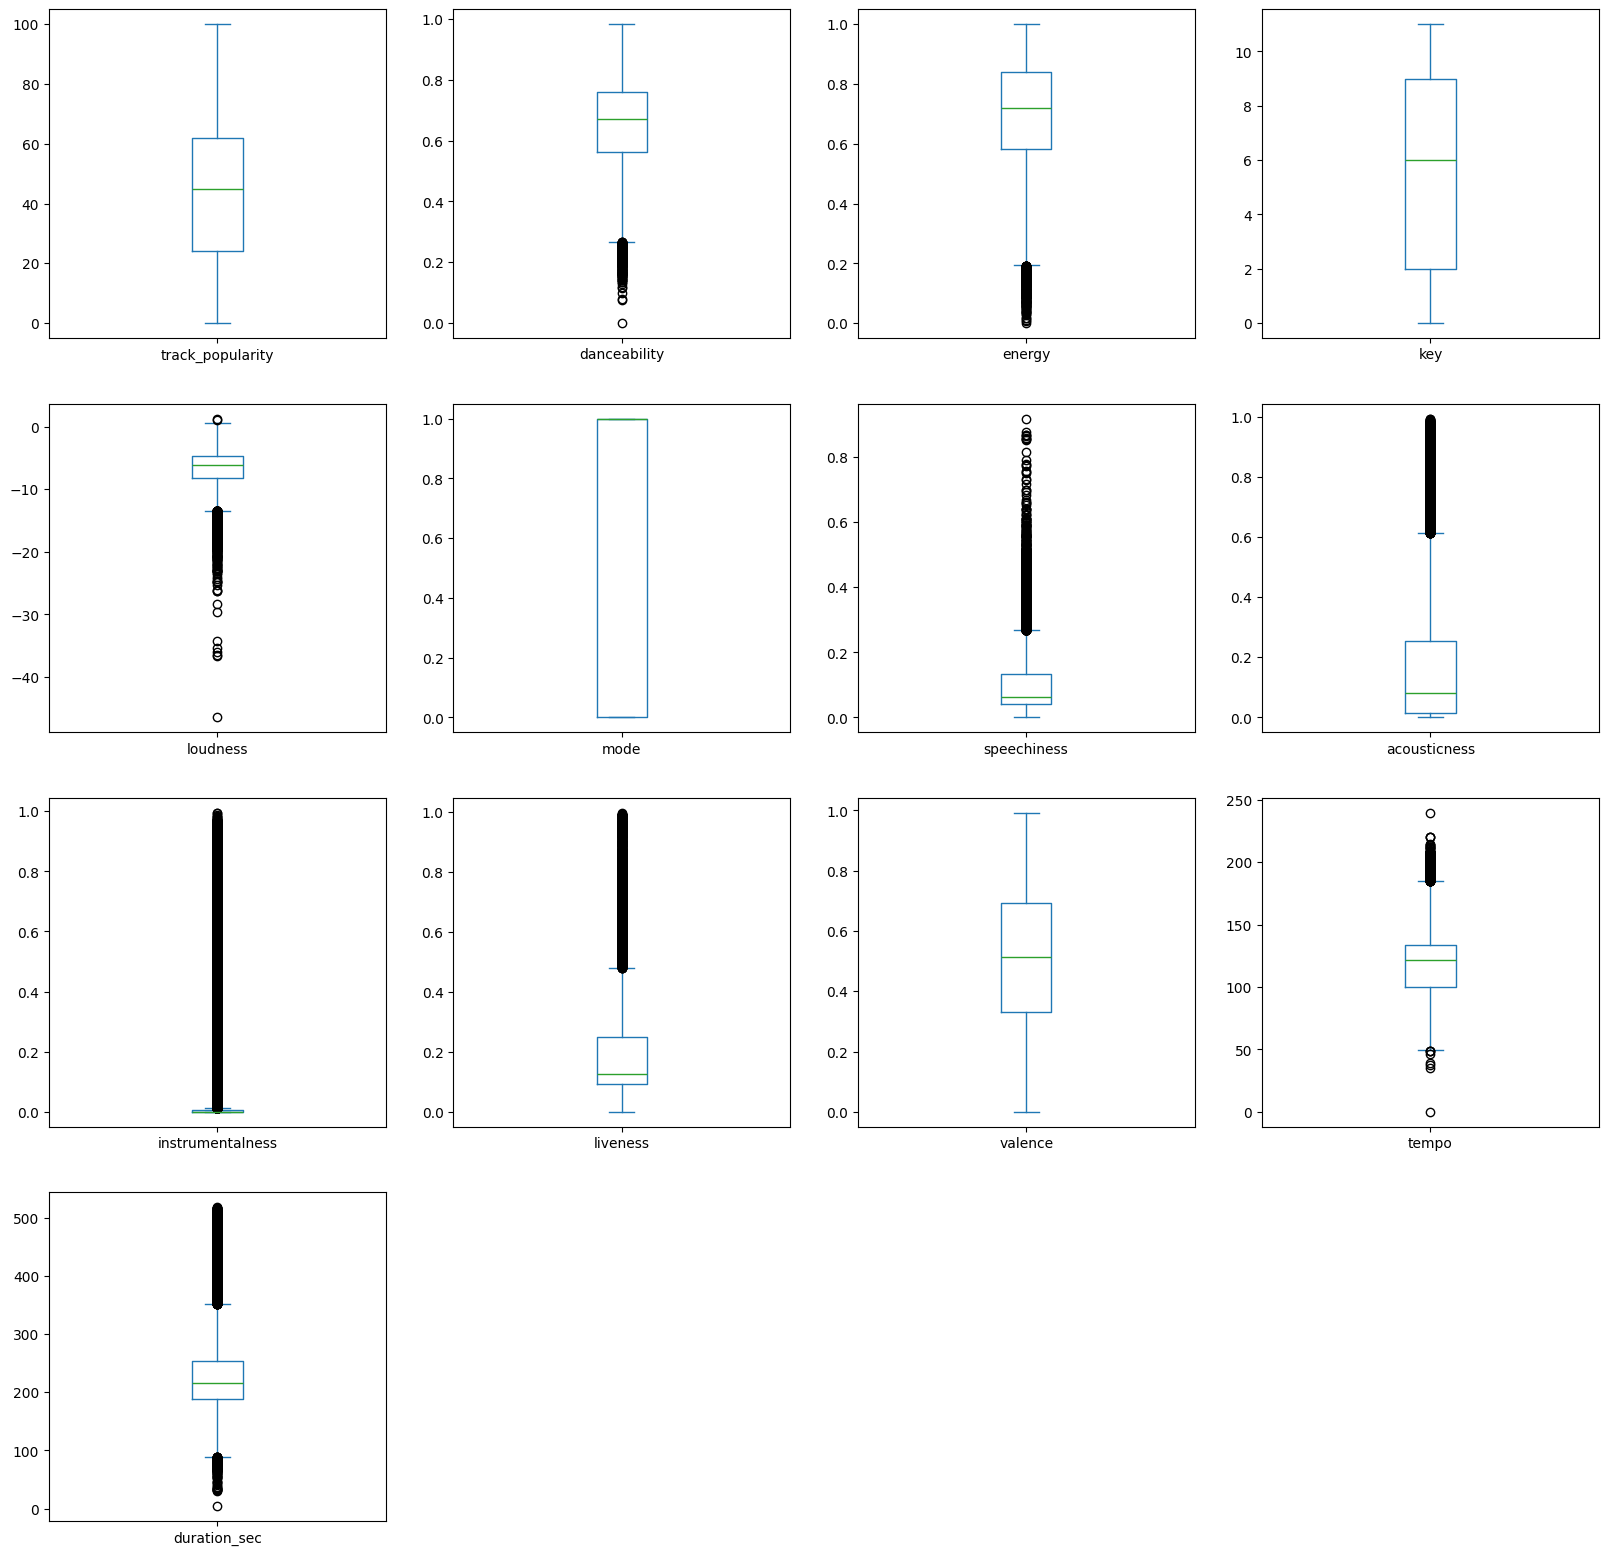

In [11]:
boxPlotAll(df)

In [12]:
df[df['loudness'] > 0]

,track_popularity,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_sec
9883,49,rap,gangster rap,0.783,0.929,11,0.551,0,0.0893,0.2000,0.004140,0.6890,0.152,118.030,134.447
10438,43,rap,trap,0.853,0.860,1,0.326,1,0.1340,0.0287,0.000000,0.0744,0.534,135.950,224.812
10458,2,rap,trap,0.878,0.855,9,0.642,1,0.0940,0.0906,0.000000,0.1740,0.330,123.991,112.273
12197,36,rock,album rock,0.345,0.998,8,1.275,1,0.2290,0.0756,0.000018,0.1080,0.280,154.850,256.067
27716,0,edm,electro house,0.725,0.996,0,1.135,1,0.0877,0.1520,0.096300,0.2950,0.355,125.054,215.055
30339,78,edm,pop edm,0.843,0.925,2,0.302,1,0.0997,0.1390,0.000008,0.1090,0.590,159.926,134.769


In [13]:
df[df['duration_sec'] < 10]

,track_popularity,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_sec
11363,0,rock,album rock,0.0,0.315,1,-26.087,1,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [14]:
df.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_sec
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,42.477081,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225.799812
std,24.984074,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59.834006
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187.819000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253.585000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517.810000


In [15]:
genres = pd.get_dummies(df['playlist_genre'])
sub_genres = pd.get_dummies(df['playlist_subgenre'])
genres.columns = ['genre_' + str(col) for col in genres.columns]
sub_genres.columns = ['subgenre_' + str(col) for col in sub_genres.columns]
df = df.join(genres)
df = df.join(sub_genres)
df = df.drop(['playlist_genre', 'playlist_subgenre'], axis=1)
df = df.replace(False, 0)
df = df.replace(True, 1)
df.head()

C:\Users\1\AppData\Local\Temp\ipykernel_37300\2111933166.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(True, 1)


,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,subgenre_new jack swing,subgenre_permanent wave,subgenre_pop edm,subgenre_post-teen pop,subgenre_progressive electro house,subgenre_reggaeton,subgenre_southern hip hop,subgenre_trap,subgenre_tropical,subgenre_urban contemporary
0,66,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,...,0,0,0,0,0,0,0,0,0,0
1,67,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,...,0,0,0,0,0,0,0,0,0,0
2,70,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,...,0,0,0,0,0,0,0,0,0,0
3,60,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,...,0,0,0,0,0,0,0,0,0,0
4,69,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,...,0,0,0,0,0,0,0,0,0,0


**Exploratory Analysis**

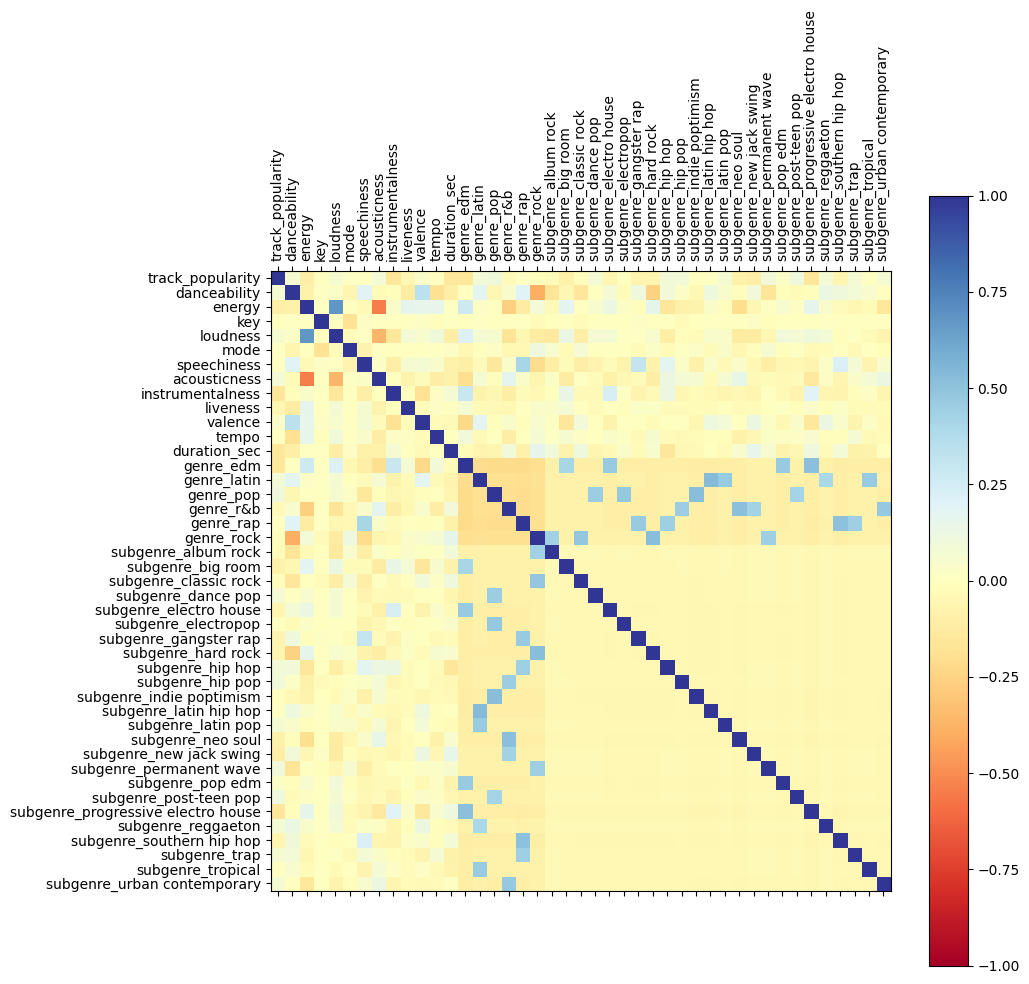

In [16]:
correlationMatrix(df)

In [17]:
df.corr().loc['track_popularity'].sort_values()

subgenre_progressive electro house   -0.150867
instrumentalness                     -0.149872
genre_edm                            -0.145304
duration_sec                         -0.143682
subgenre_new jack swing              -0.109302
energy                               -0.109112
subgenre_neo soul                    -0.089762
subgenre_big room                    -0.079680
subgenre_gangster rap                -0.063314
subgenre_electro house               -0.061247
subgenre_hard rock                   -0.057811
subgenre_southern hip hop            -0.055971
liveness                             -0.054584
subgenre_album rock                  -0.030451
genre_r&b                            -0.022337
subgenre_classic rock                -0.013531
genre_rock                           -0.012629
tempo                                -0.005378
key                                  -0.000650
subgenre_indie poptimism             -0.000015
subgenre_electropop                   0.002102
speechiness  

**Data Modeling (Regression)**

In [18]:
test_size = 0.33
seed = 1

target = ['track_popularity']

In [19]:
for col in df.columns:
    if abs(df[col].corr(df['track_popularity'])) > 0.1:
        print(type(col), 'yes')

<class 'str'> yes
<class 'str'> yes
<class 'str'> yes
<class 'str'> yes
<class 'str'> yes
<class 'str'> yes
<class 'str'> yes
<class 'str'> yes


In [20]:
predictors_all = [col for col in df.columns if col != 'track_popularity']
predictors_numeric = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_sec']
predictors_all_genres = [col for col in df.columns if 'genre' in col]
predictors_genres = [col for col in df.columns if ('genre' in col) & ('sub' not in col)]
predictors_sub_genres = [col for col in df.columns if 'subgenre' in col]
predictors_higher_corr = [col for col in df.columns if (abs(df[col].corr(df['track_popularity'])) > 0.1) & (col != 'track_popularity')]
predictors_higher_corr2 = [col for col in df.columns if (abs(df[col].corr(df['track_popularity'])) > 0.05) & (col != 'track_popularity')]
predictors_show_biasness = ['duration_sec', 'tempo']
predictors_show_biasness_genre = predictors_show_biasness + predictors_genres
predictors_all_biasness = predictors_show_biasness + predictors_all_genres

predictors_list = [predictors_all, predictors_numeric, predictors_all_genres, predictors_genres, predictors_sub_genres, predictors_higher_corr, predictors_higher_corr2, predictors_show_biasness, predictors_show_biasness_genre, predictors_all_biasness]

In [23]:
interation = 1
for combination in predictors_list:
    print('\n', str(interation))
    y = df[target]
    X = df[combination]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    # y_train = scaler.fit_transform(y_train)
    X_test = scaler.transform(X_test)
    # y_test = scaler.transform(y_test)

    models = [LinearRegression(), KNeighborsRegressor()]
    for model in models:
        model.fit(X_train, y_train)
        yhat = model.predict(X_test)
        # print('MAE: ', mean_absolute_error(y_pred=yhat, y_true=y_test))
        print('R2: ', r2_score(y_pred=yhat, y_true=y_test))
    interation += 1


 1
R2:  0.14300588057865082
R2:  0.01773617150606699

 2
R2:  0.06832548051085352
R2:  -0.0028109189789939926

 3
R2:  0.1100508594545826
R2:  -0.03280618732661189

 4
R2:  0.023163811192372097
R2:  -0.0766389442765214

 5
R2:  0.1103332632552062
R2:  -0.03280618732661189

 6
R2:  0.07908214102394051
R2:  -0.026937035943976007

 7
R2:  0.14376273040961707
R2:  0.018887920597749575

 8
R2:  0.01804558950257329
R2:  -0.05705062758125412

 9
R2:  0.040081255585130426
R2:  -0.10020539573465959

 10
R2:  0.11360162614316838
R2:  -0.04179117535540966


In [ ]:
# Values of R2 (Values normalized with MinMaxScaler)
# Predictor                    Linear Regression        KNN
# all                          0.14334717336052427      0.01568710103513926
# numerical variables          0.06832548051085319     -0.0033026819976988975
# genres & subgenres           0.11020704945758586     -0.03280618732661189  
# genres                       0.022801996842570116    -0.1468873202454093  
# subgenres                    0.11000045171109452     -0.03280618732661189  
# abs corr > 0.1               0.07908214102394051     -0.027565891558905653
# abs corr > 0.05              0.14376273040961707      0.011994362741644338
# duration, tempo              0.01804558950257329     -0.05894688451475383
# duration, tempo, genres      0.04035250091484144     -0.09923321273063568
# duration, tempo, all genres  0.11419823816574193     -0.04175195984188562

# Values of R2 (Values normalized with StandardScaler)
# Predictor                    Linear Regression        KNN
# all                          0.14300588057865082      0.01773617150606699
# numerical variables          0.06832548051085352     -0.0028109189789939926
# genres & subgenres           0.1100508594545826      -0.03280618732661189  
# genres                       0.023163811192372097    -0.0766389442765214  
# subgenres                    0.1103332632552062      -0.03280618732661189  
# abs corr > 0.1               0.07908214102394051     -0.026937035943976007
# abs corr > 0.05              0.14376273040961707      0.018887920597749575
# duration, tempo              0.01804558950257329     -0.05705062758125412
# duration, tempo, genres      0.040081255585130426    -0.10020539573465959
# duration, tempo, all genres  0.11360162614316838     -0.04179117535540966
